In [1]:
import numpy as np
import copy
from astropy.io import fits
from importlib import reload
import matplotlib.pyplot as plt
plt.rcParams['image.origin']='lower'
import os
from pathlib import Path
from datetime import datetime
date = int(datetime.today().strftime('%Y%m%d'))

import proper
proper.use_ffti = False
proper.use_fftw = False

import roman_phasec_proper as phasec
phasec.copy_here()
import falco

from IPython.display import clear_output, display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) # just making the notebook cells wider

falco_dir = Path(os.path.dirname(falco.__file__))
roman_dir = Path(os.path.dirname(falco_dir))/'roman'
flatmap_dir = roman_dir/'flatmaps'

import misc
from imshows import *

In [2]:
date = 20230727
Nitr = 30
estimator = 'perfect'
mp = misc.load_pickle(f'results/hlc_575_{Nitr}itr_{estimator}_mp_{date}.pkl')
out = misc.load_pickle(f'results/hlc_575_{Nitr}itr_{estimator}_out_{date}.pkl')

In [3]:
out.Nitr

30

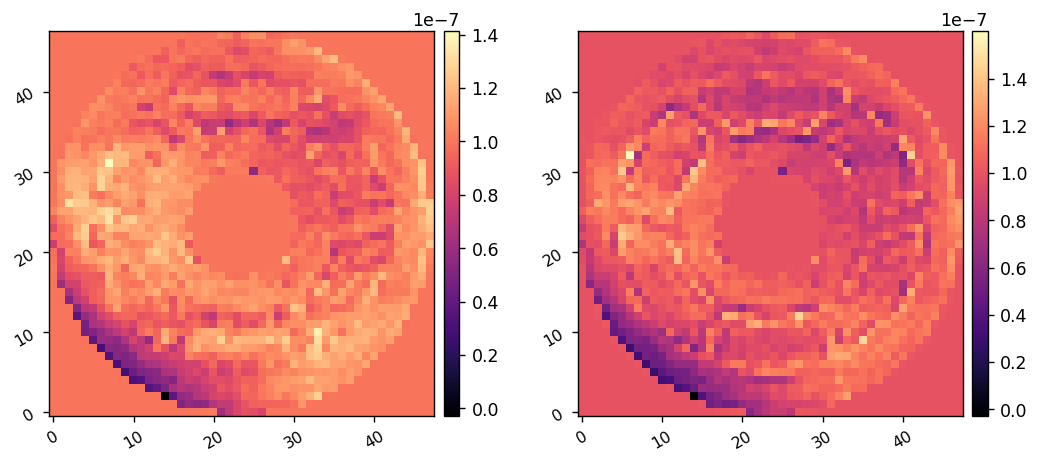

In [12]:

mp.dm1.V = out.dm1.Vall[:,:,out.Nitr]
mp.dm2.V = out.dm2.Vall[:,:,out.Nitr]

dm1_m = (mp.dm1.V + mp.dm1.biasMap + 50)*mp.dm1.VtoH
dm2_m = (mp.dm2.V + mp.dm2.biasMap + 50)*mp.dm2.VtoH
imshow2(dm1_m, dm2_m, )

In [25]:
mp.dm1.VtoH

array([[1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09],
       [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09],
       [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09],
       ...,
       [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09],
       [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09],
       [1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09]])

In [47]:
dm1_rms = np.sqrt(np.mean(mp.dm1.V.ravel()[mp.dm1.act_ele]**2))*mp.dm2.VtoH[0,0]
dm2_rms = np.sqrt(np.mean(mp.dm2.V.ravel()[mp.dm2.act_ele]**2))*mp.dm2.VtoH[0,0]
print(dm1_rms, dm2_rms)

6.115278919099777e-09 8.576638063056564e-09


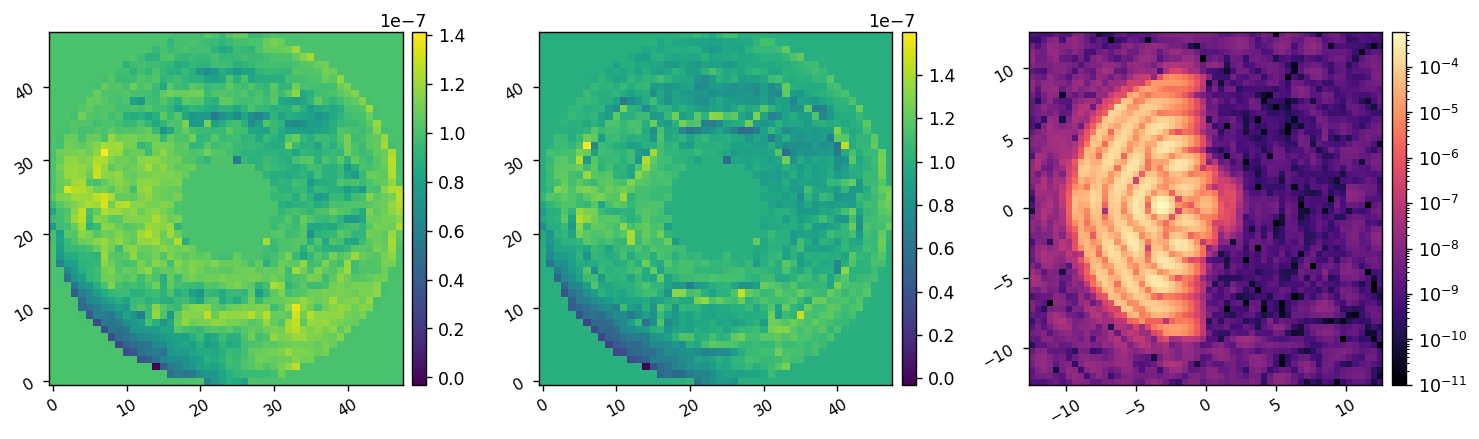

In [28]:
falco_image = falco.get_summed_image(mp)
imshow3(dm1_m, dm2_m, falco_image, 
        cmap1='viridis', cmap2='viridis',
        pxscl3=1/mp.Fend.res, lognorm3=True, vmin3=1e-11)

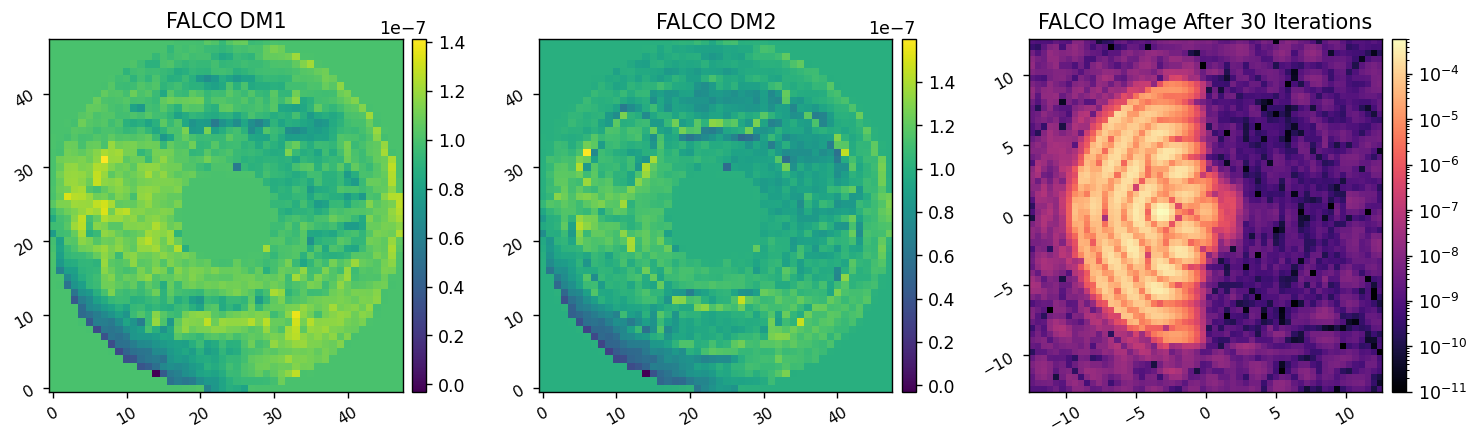

In [29]:
imshow3(dm1_m, dm2_m, falco_image, 
        'FALCO DM1', 'FALCO DM2', f'FALCO Image After {Nitr} Iterations',
        cmap1='viridis', cmap2='viridis',
        pxscl3=1/mp.Fend.res, lognorm3=True, vmin3=1e-11)



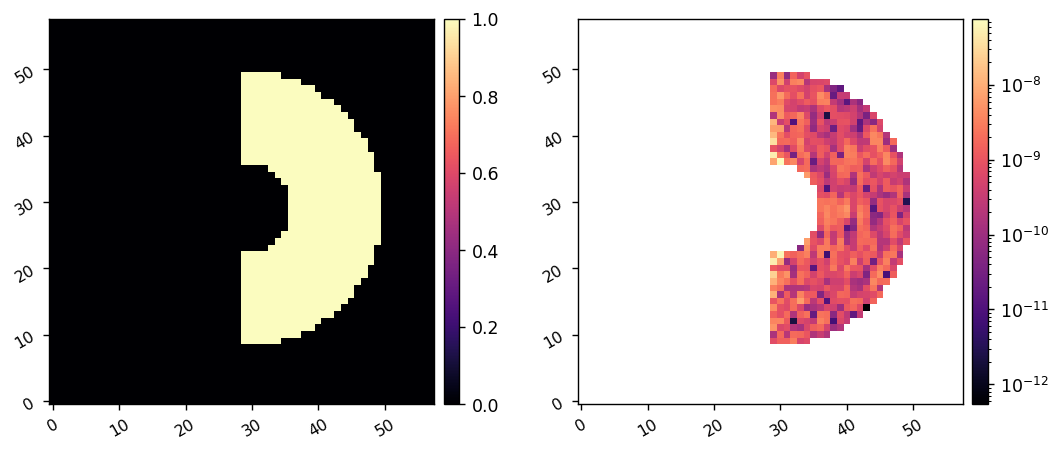

1.7656064219065418e-09


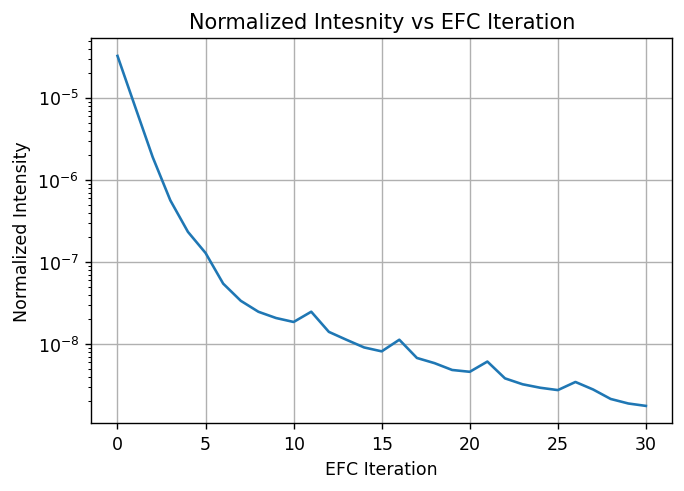

In [45]:
imshow2(mp.Fend.score.maskBool, mp.Fend.score.maskBool*falco_image, lognorm2=True)
final_NI = np.mean(falco_image[mp.Fend.score.maskBool])
print(final_NI)


x = np.arange(0,out.Nitr+1)
NIs = np.append(out.IrawScoreHist[:-1], final_NI)
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4), dpi=125)
ax.semilogy(x, NIs,)
ax.set_title('Normalized Intesnity vs EFC Iteration')
ax.set_ylabel('Normalized Intensity')
ax.set_xlabel('EFC Iteration')
ax.grid()